# Pandas DataFrame Playground (using California Housing dataset)

This notebook is just a rather shallow data analysis micro-project.

It's main purpose is described in the title.

**Imports**

For this notebook I'll use pandas and matplotlib, for some pretty ploting.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as data

plt.style.use("ggplot")
%matplotlib inline

# plt.style.available

**Fetch data**

In [2]:
cal_houses = data.california_housing.fetch_california_housing()

data = cal_houses.data
target = cal_houses.target

print cal_houses.DESCR

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [3]:
print "The dataset contains {0} records, each with {1} variables, \
plus their monthly rent price.".format(*data.shape)

The dataset contains 20640 records, each with 8 variables, plus their monthly rent price.


In [4]:
features = ["avg. income",
            "housing avg. age",
            "avg. rooms", "avg. bedrooms",
            "population", "avg. occupation",
            "latitude", "longitude"]

data_df = pd.DataFrame(data, columns=features)
target_df = pd.DataFrame(target, columns=["avg. value"])

In [5]:
data_df.head()

,avg. income,housing avg. age,avg. rooms,avg. bedrooms,population,avg. occupation,latitude,longitude
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25


In [6]:
target_df.head()

,avg. value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
data_df[["avg. rooms", "avg. bedrooms", "avg. occupation"]].head()

,avg. rooms,avg. bedrooms,avg. occupation
0,6.984127,1.023810,2.555556
1,6.238137,0.971880,2.109842
2,8.288136,1.073446,2.802260
3,5.817352,1.073059,2.547945
4,6.281853,1.081081,2.181467


**Pearson's Correlation**

Frankly, pandas `DataFrame`'s makes it ultra easy to compute the Pearson's correlation matrix between several features. Also note that `latitude` and `longitude` features are eliminated from the test.

In [8]:
data_df[features[:-2]].corr()

,avg. income,housing avg. age,avg. rooms,avg. bedrooms,population,avg. occupation
avg. income,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766
housing avg. age,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191
avg. rooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852
avg. bedrooms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863
avg. occupation,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000


**Adding columns to `DataFrame`**

Take a glance at the last column in the new data frame... Magic.

![](https://media.giphy.com/media/SKGo6OYe24EBG/giphy.gif "via GIPHY")

In [9]:
all_df = pd.concat([data_df, target_df], axis=1)

all_df.head()

,avg. income,housing avg. age,avg. rooms,avg. bedrooms,population,avg. occupation,latitude,longitude,avg. value
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422


**Pearson's Correlation, part 2**

Why not to compute the Pearson's correlation also taking into account the rent price?

In [10]:
all_df[features[:-2] + ["avg. value"]].corr()

,avg. income,housing avg. age,avg. rooms,avg. bedrooms,population,avg. occupation,avg. value
avg. income,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
housing avg. age,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
avg. rooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
avg. bedrooms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
avg. occupation,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
avg. value,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


**Ploting time**

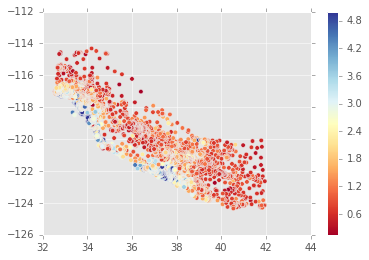

In [83]:
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(all_df["latitude"], all_df["longitude"], c=all_df["avg. value"], cmap=cm)
plt.colorbar()
plt.show()

Looks like California, and I almost see where is LA and SF. I know you can also spot these 2 cities, even without a map

**Top 1000 most expensive houses in CA**

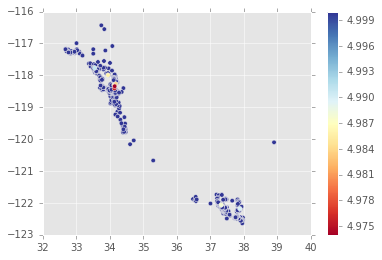

In [12]:
top1000_price = all_df.sort_values("avg. value", ascending=False)[:1000]

cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(top1000_price["latitude"], top1000_price["longitude"], c=top1000_price["avg. value"], cmap=cm)
plt.colorbar()
plt.show()

I can spot 2 pretty "serious" outliers here, let's find out why do they even exist.

**The Outliers. A story of two houses**

Through a lot of zooming from the GUI based map I found the approximate location of the 'location outlier'.
Now let's find the location of the second, 'price outlier' (the red dot).

In [68]:
location_coord = {"lat" : 38.91, "lon": -120.1}

# The red dot on the map above means a relatively high difference from the average house prices
price_outlier = top1000_price.tail(1)[["latitude", "longitude"]]

price_outlier_dict = price_outlier.to_dict()

# In[]:  price_outlier_dict
# Out[]: {'latitude': {5889: 34.149999999999999}, 'longitude': {5889: -118.34}}

low_price_coord = { key[:3] : value.values()[0] for key, value in price_outlier_dict.items()}
low_price_coord

{'lat': 34.149999999999999, 'lon': -118.34}

**Exact, human understandable location of outliers**

TL;DR: I will use Google Maps API via URL.

In [101]:
# Docs: https://developers.google.com/maps/documentation/static-maps/intro
import requests as rq

config = {
    "size": 700,
    "maptype": "satelite",
    "zoom": 15,
    "show_plot_inline": False
}

url_for = lambda coord: "https://maps.googleapis.com/maps/api/staticmap? \
                         center={lat},{lon} \
                         &zoom={zoom} \
                         &size={size}x{size} \
                         &maptype={maptype} \
                         &markers=color:blue%7Clabel:S%7C{lat},{lon} \
                         &format=png \
                         &key=YOUR_KEY_HERE".format(**dict(config, **coord))


low_price_data = rq.get(url_for(low_price_coord))
location_data = rq.get(url_for(location_coord))


print "In case that you want a better picture, input the lines below in a Markdown cell."
print
print "![]({0})".format(url_for(low_price_coord).replace(" ", ""))
print "OR"
print "![]({0})".format(url_for(location_coord).replace(" ", ""))

In case that you want a better picture, input the lines below in a Markdown cell.

![](https://maps.googleapis.com/maps/api/staticmap?center=34.15,-118.34&zoom=15&size=700x700&maptype=satelite&markers=color:blue%7Clabel:S%7C34.15,-118.34&format=png&key=YOUR_KEY_HERE)
OR
![](https://maps.googleapis.com/maps/api/staticmap?center=38.91,-120.1&zoom=15&size=700x700&maptype=satelite&markers=color:blue%7Clabel:S%7C38.91,-120.1&format=png&key=YOUR_KEY_HERE)


**The approximate location of 'location outlier'**

![](../tmp/img1.png)

**The exact location of the 'price outlier' in our top 1000 most expensive houses**

![](../tmp/img2.png)


Warner Bros. Studio, I imagine how noisy is there...